In [9]:
import pandas as pd
import numpy as np

# Graph
import plotly.express as px
import matplotlib.pyplot as plt

# Keras
from keras.models import Sequential
from keras.layers import Dense
from keras import callbacks

# sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# tf
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.optimizers import SGD

In [2]:
path = r"D:\TRAVAIL\Inge_3\Projet - Prédiction du type d’application Internet dans le contexte de traffic chiffré\network_analysis\data\dataset_clean.csv"

In [3]:
df = pd.read_csv(path)

list_protocol = ["AMAZON", "MICROSOFT", "YOUTUBE", "GMAIL", "WINDOWS_UPDATE", "SKYPE", "FACEBOOK", "DROPBOX"]
df = df[df['ProtocolName'].isin(list_protocol)]
df = df.drop(
    [
        "ProtocolName",
        "Month",
        "Day",
        "Protocol",
        "ECE.Flag.Count",
        "RST.Flag.Count",
        "Active.Max",
        "Active.Min",
        "Idle.Mean",
        "Idle.Max",
        "Active.Mean",
        "Idle.Std",
        "Bwd.Packet.Length.Min",
        "FIN.Flag.Count",
        "Min.Packet.Length",
        "Idle.Min",
        "Active.Std",
        "URG.Flag.Count",
        "SYN.Flag.Count",
        "ACK.Flag.Count",
        "Fwd.Packet.Length.Min",
        "Fwd.PSH.Flags",
        "PSH.Flag.Count",
        "Subflow.Fwd.Packets",
        "Total.Fwd.Packets",
        "Subflow.Bwd.Packets",
        "Subflow.Bwd.Bytes",
        "Total.Length.of.Bwd.Packets",
        "Down.Up.Ratio",
        "Bwd.Header.Length",
        "Packet.Length.Variance",
        "Packet.Length.Mean",
        "Subflow.Fwd.Bytes",
        "Max.Packet.Length",
        "Packet.Length.Std",
        "min_seg_size_forward",
        "Fwd.IAT.Max",
        "Average.Packet.Size",
        "Flow.IAT.Mean",
        "Flow.Packets.s",
        "Fwd.Packet.Length.Max",
        "act_data_pkt_fwd",
        "Fwd.Header.Length",
        "Fwd.Header.Length.1",
        "Avg.Bwd.Segment.Size",
        "Bwd.Packet.Length.Min",
        "Total.Backward.Packets",
        "Bwd.Packet.Length.Max",
        "Bwd.Packet.Length.Std",
        "Flow.IAT.Std",
        "Bwd.IAT.Min",
        "Fwd.IAT.Total",
        "Fwd.IAT.Std",
        "Flow.ID",
        "Source.IP",
        "Destination.IP",
        "Bwd.Packet.Length.Mean",
    ],
    axis=1,
)


In [4]:
df

,Source.Port,Destination.Port,Flow.Duration,Total.Length.of.Fwd.Packets,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Flow.Bytes.s,Flow.IAT.Max,Flow.IAT.Min,Fwd.IAT.Mean,...,Bwd.IAT.Total,Bwd.IAT.Mean,Bwd.IAT.Std,Bwd.IAT.Max,Fwd.Packets.s,Bwd.Packets.s,Avg.Fwd.Segment.Size,Init_Win_bytes_forward,Init_Win_bytes_backward,L7Protocol
35,55980,3128,247289,1388,92.533333,112.519755,5612.865918,123553.0,0,1.766350e+04,...,0.0,0.000000e+00,0.000000e+00,0.0,60.657773,0.000000,92.533333,8192,-1,124
36,37557,443,243047,922,43.904762,93.559021,42181.141919,182523.0,0,1.215235e+04,...,49652.0,3.103250e+03,7.938189e+03,28749.0,86.403041,69.945319,43.904762,14600,243,124
37,37557,443,10022,0,0.000000,0.000000,0.000000,10022.0,10022,0.000000e+00,...,0.0,0.000000e+00,0.000000e+00,0.0,99.780483,99.780483,0.000000,1000,243,124
81,52680,3128,405528,669,95.571429,114.309313,43947.643566,132145.0,0,6.758800e+04,...,350844.0,1.096388e+04,3.347519e+04,132145.0,17.261447,81.375392,95.571429,8192,279,124
82,44858,443,346773,443,55.375000,103.118431,9349.055434,131344.0,0,4.953900e+04,...,138459.0,6.922950e+04,9.675413e+04,137645.0,23.069847,8.651193,55.375000,14600,340,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3568754,443,57682,328,0,0.000000,0.000000,0.000000,328.0,0,0.000000e+00,...,0.0,0.000000e+00,0.000000e+00,0.0,3048.780488,6097.560976,0.000000,26,1321,122
3568799,443,44795,74956125,361,40.111111,23.592607,8.324870,24995402.0,1,9.369502e+06,...,74956124.0,8.328458e+06,1.226309e+07,24995631.0,0.120070,0.133411,40.111111,28,455,122
3568889,443,44795,108243326,260,52.000000,0.000000,2.401996,29959004.0,58,2.706079e+07,...,108243268.0,2.706082e+07,2.420628e+06,29963311.0,0.046192,0.046192,52.000000,30,455,122
3568952,443,44795,112893912,413,45.888889,33.979569,5.651323,29911982.0,1,1.411173e+07,...,112893791.0,1.881563e+07,2.273906e+07,55737061.0,0.079721,0.062005,45.888889,30,455,122


In [5]:
TARGET = 'L7Protocol'

In [14]:
y = pd.get_dummies(df[TARGET])
X = df.drop([TARGET],axis=1)

In [17]:
X.shape
y.shape

(471854, 20)

In [19]:
y=pd.DataFrame([x for x in np.where(y ==1, y.columns,'').flatten().tolist() if len(x) >0],columns= (["Output"]) )
y=y.to_numpy()
y

array([['124'],
       ['124'],
       ['124'],
       ...,
       ['122'],
       ['122'],
       ['122']], dtype=object)

In [20]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
y = to_categorical(y)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [34]:
X_test.shape

(94371, 1, 20)

In [24]:
X_train = np.reshape(X_train, (X_train.shape[0],1,X.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0],1,X.shape[1]))

In [28]:
tf.keras.backend.clear_session()

model = Sequential()

model.add(LSTM(128, input_shape=(1,20),activation="relu",return_sequences=True))
#model.add(Dropout(0.2))
model.add(LSTM(128,activation="relu"))
#model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            76288     
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 213)               27477     
                                                                 
Total params: 235,349
Trainable params: 235,349
Non-trainable params: 0
_________________________________________________________________


In [29]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", 
                                        patience = 3, 
                                        restore_best_weights = True)

In [30]:
history = model.fit(X_train, y_train, 
                    epochs = 25, 
                    validation_data= (X_test, y_test),
                    callbacks =[earlystopping])
history

Epoch 1/25
11797/11797 [==============================] - 65s 5ms/step - loss: 0.0125 - accuracy: 0.5491 - val_loss: 0.0085 - val_accuracy: 0.6319
Epoch 2/25
11797/11797 [==============================] - 65s 6ms/step - loss: 0.0079 - accuracy: 0.6551 - val_loss: 0.0077 - val_accuracy: 0.6632
Epoch 3/25
11797/11797 [==============================] - 66s 6ms/step - loss: 0.0072 - accuracy: 0.6921 - val_loss: 0.0069 - val_accuracy: 0.6981
Epoch 4/25
11797/11797 [==============================] - 76s 6ms/step - loss: 0.0067 - accuracy: 0.7100 - val_loss: 0.0066 - val_accuracy: 0.7173
Epoch 5/25
11797/11797 [==============================] - 72s 6ms/step - loss: 0.0064 - accuracy: 0.7214 - val_loss: 0.0063 - val_accuracy: 0.7284
Epoch 6/25
11797/11797 [==============================] - 68s 6ms/step - loss: 0.0062 - accuracy: 0.7299 - val_loss: 0.0061 - val_accuracy: 0.7313
Epoch 7/25
11797/11797 [==============================] - 67s 6ms/step - loss: 0.0061 - accuracy: 0.7361 - val_loss: 0

In [31]:
acc2 = model.evaluate(X_test, y_test)
acc2

2950/2950 [==============================] - 8s 3ms/step - loss: 0.0052 - accuracy: 0.7783


[0.005157690029591322, 0.7782899141311646]

In [ ]:
# 0.7783

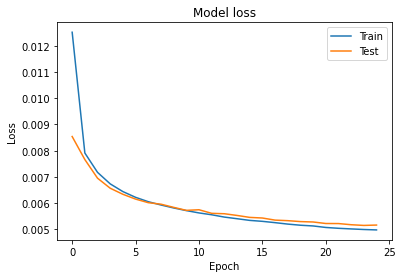

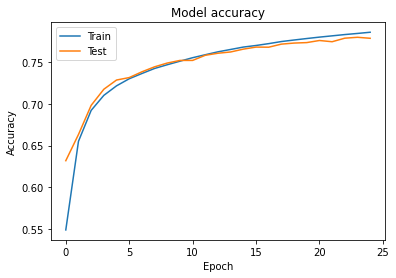

In [33]:
# loss plot function
def plot_loss(loss,val_loss):
    plt.figure()
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')  
    plt.show()
    
# accuracy plot function    
def plot_accuracy(acc,val_acc):
    plt.figure()
    plt.plot(acc)
    plt.plot(val_acc)
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# plot loss and accuracy curves
plot_loss(history.history['loss'], history.history['val_loss'])
plot_accuracy(history.history['accuracy'], history.history['val_accuracy'])